In [71]:
import os 
import tarfile

import pandas as pd
import numpy as np
import matplotlib as mp

In [72]:
data_path = os.path.join("datasets/cltv_data", "train_BRCpofr.csv")

In [73]:
data = pd.read_csv(data_path)

In [74]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [75]:
lables = data["cltv"]

In [76]:
# data.drop("cltv", axis=1, inplace=True)

In [77]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [78]:
%matplotlib inline

In [42]:
data["claim_amount_per_year"] = data["claim_amount"] / data["vintage"]
data.head()
data["claim_amount_per_year"].fillna(data["claim_amount"], inplace=True)
data.isna().sum()
data["claim_amount_per_year"].replace(np.inf, 0, inplace=True)

,claim_amount,vintage


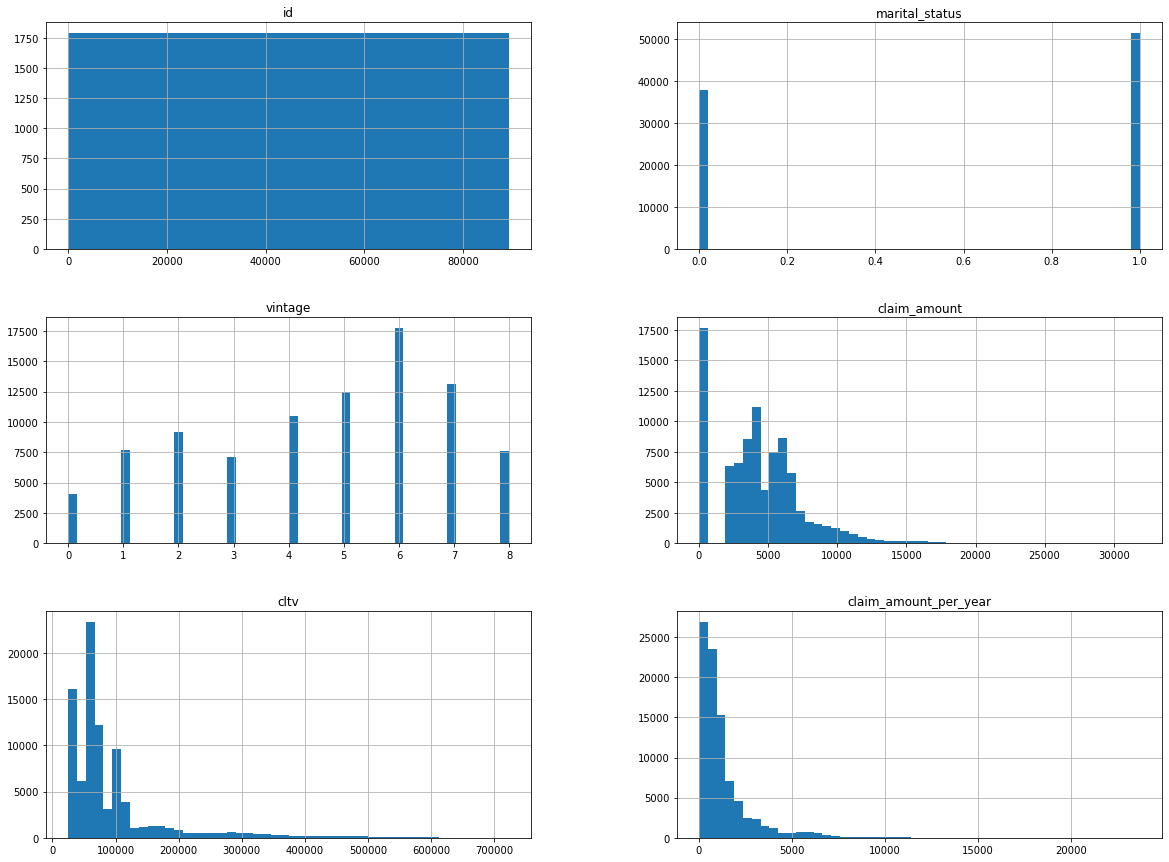

In [43]:
data.hist(bins=50, figsize=(20,15))
mp.pyplot.show()

In [45]:
gender_data = data[["gender"]]
area_data = data[["area"]]
qualification_data = data[["qualification"]]
income_data = data[["income"]]
num_policies_data = data[["num_policies"]]
policy_data = data[["policy"]]
type_of_policy_data = data[["type_of_policy"]]

<AxesSubplot:>

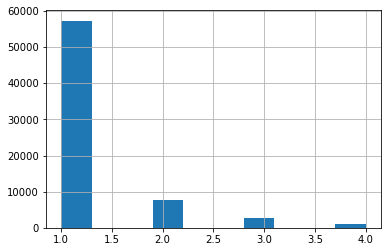

In [60]:
data["claim_per_year_cat"] = pd.cut(data["claim_amount_per_year"],
                                   bins=[0., 2500., 5000., 7500., np.inf],
                                   labels=[1, 2, 3, 4])
data["claim_per_year_cat"].hist()

In [72]:
data[data["claim_per_year_cat"].isna()] = 1 # wrong!!!
data.iloc[:10]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,claim_amount_per_year,claim_per_year_cat


In [73]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["claim_per_year_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set  = data.loc[test_index]
strat_train_set

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,claim_amount_per_year,claim_per_year_cat
81611,81612,Female,Urban,Bachelor,2L-5L,0,2,3729,1,A,Silver,31548,1864.500000,1
33203,33204,Female,Urban,High School,5L-10L,1,3,5571,1,C,Platinum,57132,1857.000000,1
20548,20549,Female,Urban,High School,2L-5L,0,4,3112,1,A,Gold,67068,778.000000,1
88384,88385,Male,Urban,High School,2L-5L,0,6,4746,More than 1,A,Platinum,60720,791.000000,1
86187,86188,Male,Urban,High School,5L-10L,0,4,4564,More than 1,A,Platinum,109524,1141.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85962,85963,Male,Urban,Bachelor,5L-10L,0,2,4621,More than 1,A,Gold,103764,2310.500000,1
80871,80872,Male,Urban,High School,2L-5L,1,3,4297,More than 1,A,Gold,98892,1432.333333,1
78617,78618,Male,Urban,Bachelor,2L-5L,0,7,6270,1,A,Gold,52488,895.714286,1
42187,1,1,1,1,1,1,1,1,1,1,1,1,1.000000,1


In [74]:
strat_test_set

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,claim_amount_per_year,claim_per_year_cat
70351,70352,Male,Urban,High School,5L-10L,1,3,4760,More than 1,B,Silver,399336,1586.666667,1
23982,23983,Male,Urban,Bachelor,5L-10L,1,4,6279,1,A,Platinum,51180,1569.750000,1
45070,45071,Male,Urban,Bachelor,More than 10L,1,5,4589,More than 1,A,Gold,57168,917.800000,1
54859,54860,Female,Urban,High School,More than 10L,1,7,4494,More than 1,C,Platinum,68352,642.000000,1
64444,64445,Female,Urban,High School,More than 10L,0,3,7861,More than 1,A,Silver,300588,2620.333333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88243,1,1,1,1,1,1,1,1,1,1,1,1,1.000000,1
2081,2082,Male,Urban,Bachelor,More than 10L,1,8,3583,More than 1,A,Platinum,65580,447.875000,1
8444,1,1,1,1,1,1,1,1,1,1,1,1,1.000000,1
23516,23517,Male,Rural,Bachelor,5L-10L,0,4,5671,1,A,Silver,55572,1417.750000,1


In [75]:
strat_test_set["claim_per_year_cat"].value_counts() / len(strat_test_set)

1    0.872141
2    0.086862
3    0.029979
4    0.011019
Name: claim_per_year_cat, dtype: float64

In [76]:
data["claim_per_year_cat"].value_counts() / len(data)

1    0.872136
2    0.086876
3    0.029980
4    0.011008
Name: claim_per_year_cat, dtype: float64

In [77]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("claim_per_year_cat", axis=1, inplace=True)

In [79]:
corr_matrix = data.corr()

In [80]:
corr_matrix["cltv"].sort_values(ascending=False)

cltv                     1.000000
claim_amount             0.410488
vintage                  0.311109
id                       0.292568
claim_amount_per_year    0.240911
marital_status          -0.243484
Name: cltv, dtype: float64

In [81]:
data = strat_train_set.copy()

In [82]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='claim_amount', ylabel='claim_amount'>,
        <AxesSubplot:xlabel='vintage', ylabel='claim_amount'>,
        <AxesSubplot:xlabel='claim_amount_per_year', ylabel='claim_amount'>,
        <AxesSubplot:xlabel='cltv', ylabel='claim_amount'>],
       [<AxesSubplot:xlabel='claim_amount', ylabel='vintage'>,
        <AxesSubplot:xlabel='vintage', ylabel='vintage'>,
        <AxesSubplot:xlabel='claim_amount_per_year', ylabel='vintage'>,
        <AxesSubplot:xlabel='cltv', ylabel='vintage'>],
       [<AxesSubplot:xlabel='claim_amount', ylabel='claim_amount_per_year'>,
        <AxesSubplot:xlabel='vintage', ylabel='claim_amount_per_year'>,
        <AxesSubplot:xlabel='claim_amount_per_year', ylabel='claim_amount_per_year'>,
        <AxesSubplot:xlabel='cltv', ylabel='claim_amount_per_year'>],
       [<AxesSubplot:xlabel='claim_amount', ylabel='cltv'>,
        <AxesSubplot:xlabel='vintage', ylabel='cltv'>,
        <AxesSubplot:xlabel='claim_amount_per_year', ylabel='c

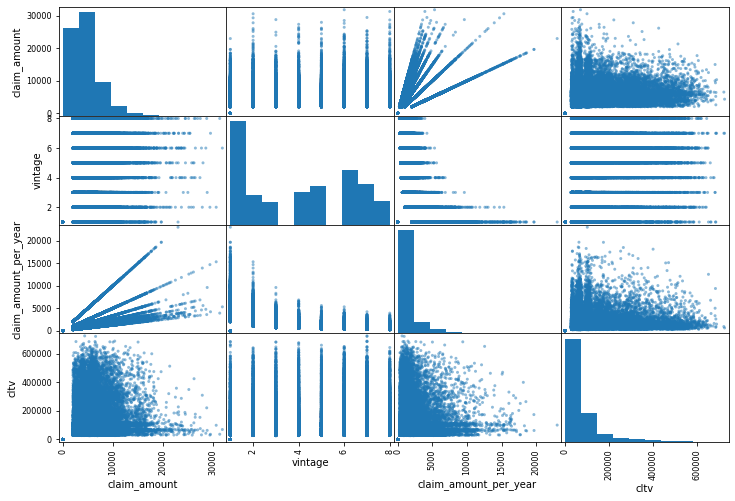

In [83]:
attributes = ["claim_amount", "vintage", "claim_amount_per_year", "cltv"]
scatter_matrix(data[attributes], figsize=(12,8))

In [84]:
data = strat_train_set.drop("cltv", axis=1)
data_labels = strat_train_set["cltv"].copy()

In [89]:
data_num = data[["claim_amount"]]

In [88]:
from sklearn.preprocessing import StandardScaler

In [91]:
std_scaler = StandardScaler()
std_scaler.fit(data_num)

StandardScaler()

In [92]:
data_num = std_scaler.transform(data_num)

In [98]:
data_num

array([[-0.13634569],
       [ 0.42028812],
       [-0.32279686],
       ...,
       [ 0.63151887],
       [-1.26290967],
       [ 0.41454652]])

In [ ]:
cat_attribs = [""]